In [33]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [34]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## loading handwritten digits dataset
dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. 
x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

returns Tuple of NumPy arrays-(X_train,y_train),(X_test,y_test)

In [35]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()


In [36]:
len(X_train)

60000

In [37]:
len(y_train)

60000

In [38]:
len(X_test)

10000

## Each Individual sample

In [39]:
X_train[0].shape

(28, 28)

In [40]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## First Training Image

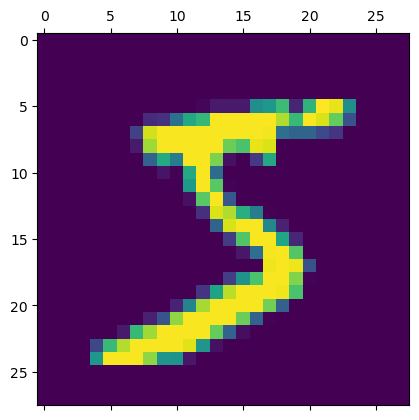

In [41]:
plt.matshow(X_train[0])

In [42]:
y_train[0]

5

In [43]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

## Flatten 2d to 1d array

In [44]:
X_train.shape

(60000, 28, 28)

In [45]:
X_train = X_train / 255
X_test = X_test / 255
#scaling -to improve the accuracy

In [46]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [47]:
X_train_flattened.shape

(60000, 784)

In [48]:
X_test_flattened.shape

(10000, 784)

In [49]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [50]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4682 - accuracy: 0.8796
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3036 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2834 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2728 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2669 - accuracy: 0.9259


sequential-stack of layers in neural network
every layer has 1 element
dense-all the neurons in 1 layer connected with 2nd layer
input shape-784
output-10
..........................................
compile the Neural network.
loss-Computes the crossentropy loss between the labels and predictions.
Optimizer that implements the Adam algorithm.
accuracy-Calculates how often predictions equal labels.

In [52]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2699 - accuracy: 0.9245


[0.269918292760849, 0.9244999885559082]

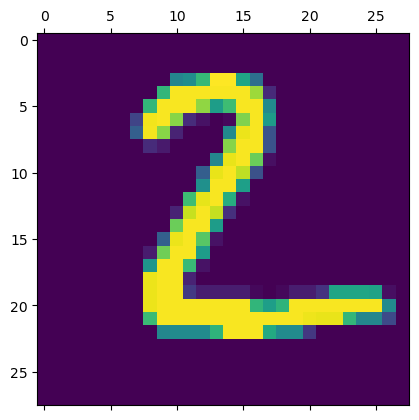

In [53]:
plt.matshow(X_test[1])

In [54]:
y_pred=model.predict(X_test_flattened)
y_pred[1]

313/313 [==============================] - 1s 2ms/step


array([5.6309927e-01, 4.7339848e-03, 9.9931759e-01, 3.1551757e-01,
       7.7030260e-10, 8.2919103e-01, 8.4727925e-01, 5.3395195e-13,
       1.6326179e-01, 2.9716185e-09], dtype=float32)

10 scores are predicted and we have to check which score is the maximum

In [55]:
np.argmax(y_pred[1])

2

In [56]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [57]:

y_pred_labels=[np.argmax(i) for i in y_pred]

In [58]:
y_pred_labels[:5]

[7, 2, 1, 0, 4]

## confusion matrix

In [59]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    1,    1,    0,    3,    2,    2,    2,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   7,    9,  923,   18,    8,    1,   11,   10,   42,    3],
       [   4,    0,   20,  924,    1,   17,    1,   11,   23,    9],
       [   2,    1,    7,    2,  919,    0,    6,    4,   10,   31],
       [  14,    3,    6,   40,   12,  752,    9,    9,   39,    8],
       [  19,    3,   11,    1,    8,   13,  896,    2,    5,    0],
       [   2,    5,   22,    6,    7,    0,    0,  949,    3,   34],
       [   8,    6,    7,   19,    9,   18,    7,   11,  882,    7],
       [  10,    7,    1,   11,   28,    4,    0,   19,    8,  921]])>

Text(95.72222222222221, 0.5, 'Truth')

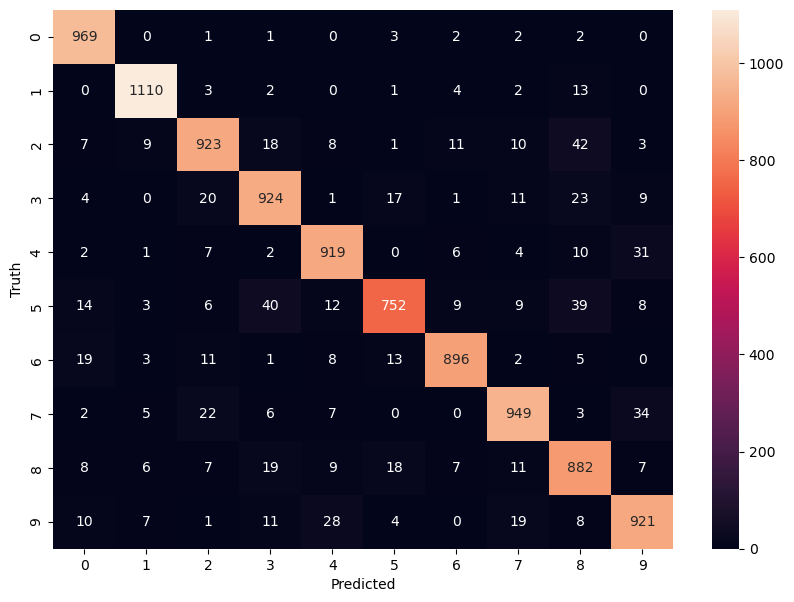

In [60]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## adding hidden layers

In [61]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2719 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1253 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0887 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0656 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0513 - accuracy: 0.9845


In [62]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0812 - accuracy: 0.9748


[0.08122457563877106, 0.9747999906539917]

313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

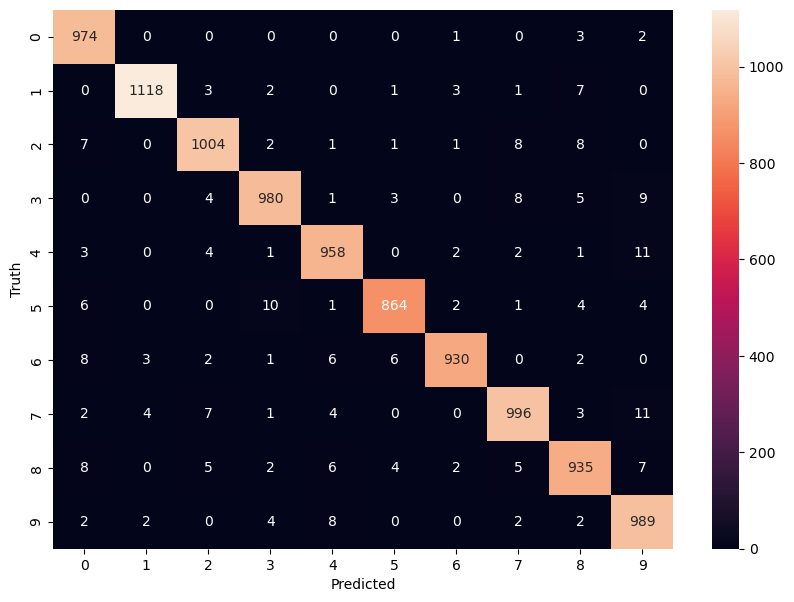

In [63]:
y_pred = model.predict(X_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using Flatten layer so that we don't have to call .reshape on input dataset

In [64]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2719 - accuracy: 0.9226
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1211 - accuracy: 0.9642
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0836 - accuracy: 0.9752
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0630 - accuracy: 0.9809
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0493 - accuracy: 0.9852
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0410 - accuracy: 0.9877
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0321 - accuracy: 0.9905
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0265 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0230 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.017

In [65]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0818 - accuracy: 0.9768


[0.08179154992103577, 0.9768000245094299]